<div align="center">

### **PARCIAL #1 SEÑALES Y SISTEMAS - 2025 2S**
#### **Estudiante:** Martín Ramírez Espinosa
##### Departamento de Ingeniería Eléctrica, Electrónica y Computación
##### Universidad Nacional de Colombia - Sede Manizales

</div>

---

In [42]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

---

**1.** La distancia media entre dos señales periódicas $x_1(t) \in \mathbb{R}, \mathbb{C}$ y $x_2(t) \in \mathbb{R}, \mathbb{C}$; se puede expresar a partir de la potencia media de la diferencia entre ellas:

<div align="center">

$d^2(x_1, x_2) = \overline{P}_{(x_1 - x_2)} = \lim_{T\to\infty} \frac{1}{T} \int_{T} \left| x_{1}(t) - x_{2}(t) \right|^{2} \, dt$

</div>

Sean $x_1(t)$ y $x_2(t)$ definidas como:

<div align="center">

$
\begin{aligned}
x_{1}(t) &= A e^{-\mathrm{j} n \omega_{0} t} &\qquad& \omega_{0}=\frac{2\pi}{\Tau},\ \ \Tau,A,B\in\mathbb{R}^{+},\ \ n,m\in\mathbb{Z} \\
x_{2}(t) &= B e^{\mathrm{j} m \omega_{0} t} &&
\end{aligned}
$

</div>

Determine la distancia entre las dos señales. Compruebe sus resultados con Python.

In [43]:
''' Definición de las variables simbólicas '''
# Variable independiente
t = sp.symbols('t', real=True) # Tiempo [s]

# Parámetros de las señales
A, B = sp.symbols('A B', real=True, positive=True)  # Amplitudes
T = sp.symbols('T', real=True, positive=True)       # Periodo [s]
w_0 = 2 * sp.pi / T                                 # Frecuencia angular fundamental [rad/s]
n, m = sp.symbols('n m', integer=True)              # Múltiplos enteros de la frecuencia fundamental

''' Definición de las señales '''
x_1 = A * sp.exp( -sp.I * n * w_0 * t )  # x_1(t)
x_2 = B * sp.exp( sp.I * m * w_0 * t )   # x_2(t)

''' Cálculo de la distancia media entre las señales '''
# Definición de la distancia media
d = sp.sqrt(sp.limit( (1 / T) * sp.integrate( sp.Abs(x_1 - x_2)**2, (t, 0, T) ), T, sp.oo ))
# Imprimir el resultado
d

sqrt(A**2 - 2*A*B + B**2)

---

**2.** Encuentre la señal en tiempo discreto al utilizar un conversor análogo a digital con frecuencia de muestreo de $5 kHz$ y $4 bits$ de capacidad de representación aplicado a la señal continua:

<div align="center">

$x(t) = 3\cos(1000\pi t) + 5\sin(3000\pi t) + 10\cos(11000\pi t)$

</div>

Realizar la simulación del proceso de discretización de al menos tres periodos de $x(t)$. En caso de que la discretización no sea apropiada, diseñe e implemete un conversor adecuado para la señal estudiada.

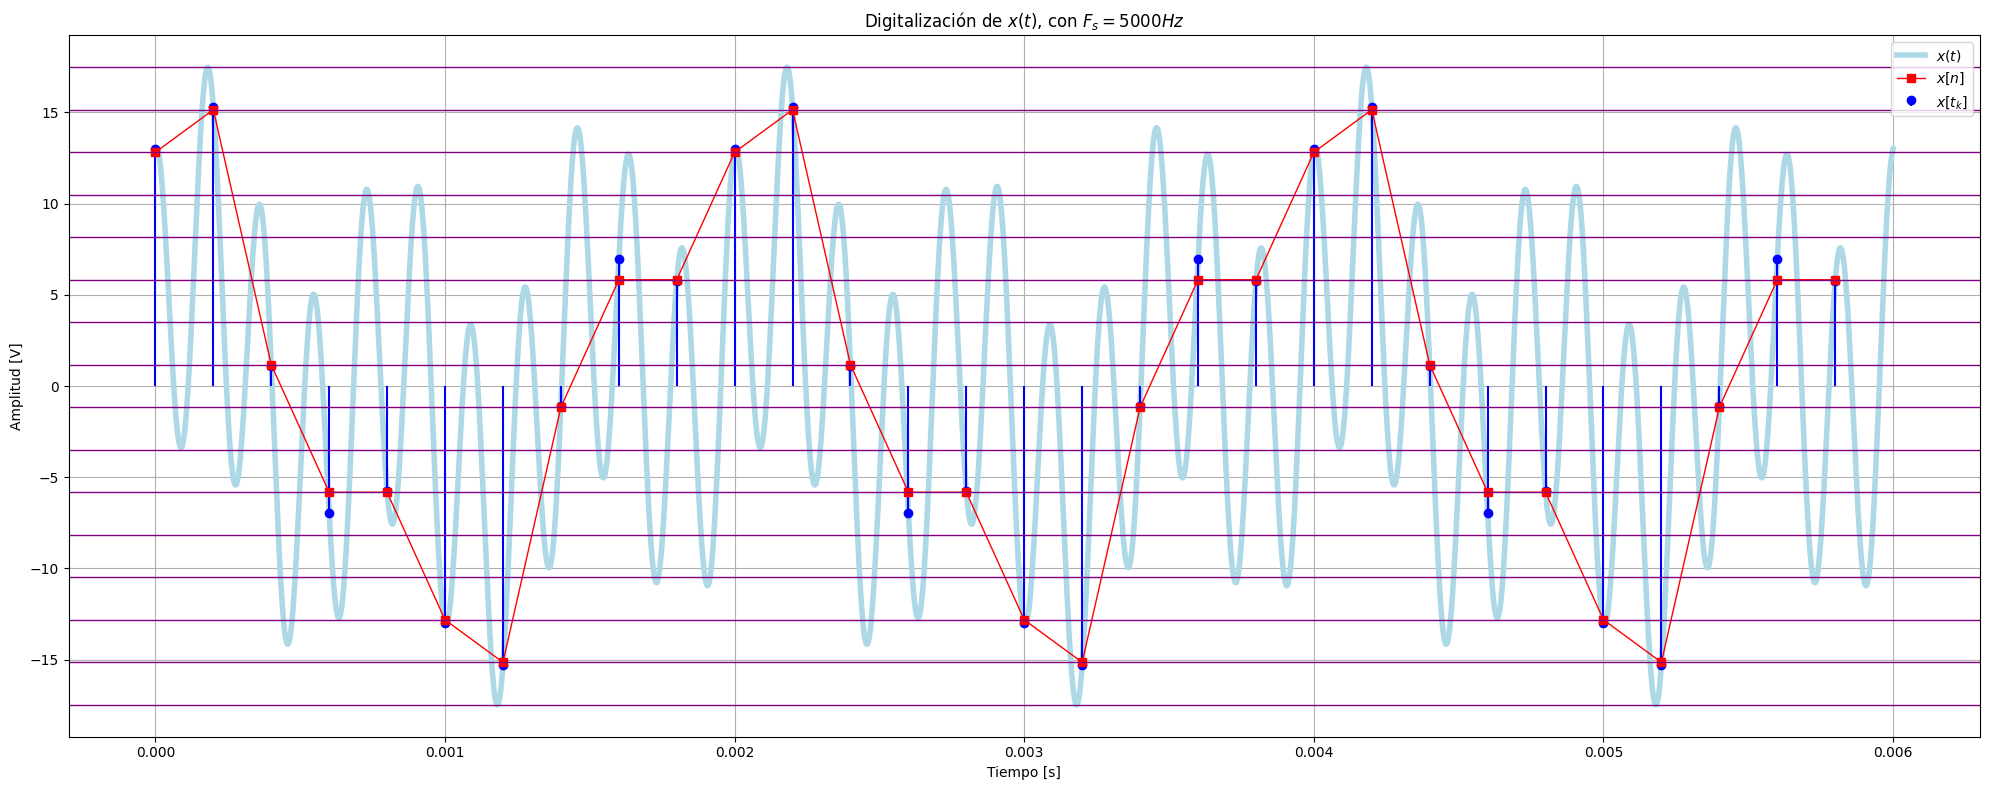

In [44]:
''' Parámetros del conversor A/D '''
# Muestreo
F_s = 5000    # Frecuencia de muestreo [Hz]
T_s = 1 / F_s  # Periodo de muestreo [s]

# Capacidad de representación
n_bits = 4              # Número de bits
num_levels = 2**n_bits  # Número de niveles de cuantización

''' Tiempos '''
T_0 = 1 / 500                        # Periodo de la señal x(t) [s]
sim_time = 3 * T_0                   # Tiempo de simulación [s]
t = np.linspace(0, sim_time, 20000)  # Vector de tiempo 'continuo' [s]
t_k = np.arange(0, sim_time, T_s)    # Vector de tiempo discreto [s]

''' Definición de la señal x(t) '''
x_t = 3 * np.cos(1000*np.pi*t) + 5 * np.sin(3000*np.pi*t) + 10 * np.cos(11000*np.pi*t)  # x(t) [V]

''' Digitalización '''
# Discretización
x_tk = 3 * np.cos(1000*np.pi*t_k) + 5 * np.sin(3000*np.pi*t_k) + 10 * np.cos(11000*np.pi*t_k)  # x[t_k] [V]

# Cuantización
levels = np.linspace(min(x_t), max(x_t), num_levels)  # Vector de niveles de cuantización
distances = np.abs(x_tk[:, None] - levels[None, :])   # Matriz de distancias entre muestras y niveles
indices = np.argmin(distances, axis=1)                # Índices de los niveles más cercanos

# Señal digitalizada
x_n = levels[indices]  # x[n] [V]

''' Visualización '''
# Gráfica 1: Digitalización de x(t) con Fs = 5000 Hz (incumple Nyquist)
plt.figure(figsize=(20, 8))
plt.plot(t, x_t, label='$x(t)$', color='lightblue', linewidth=4)
plt.stem(t_k, x_tk, label='$x[t_k]$', linefmt='blue', markerfmt='blue', basefmt=" ")
plt.plot(t_k, x_n, label='$x[n]$', color='red', marker='s', linestyle='-', linewidth=1)

# Dibujar los niveles de cuantización como rectas constantes
for lvl in levels:
	plt.axhline(lvl, color='purple', linewidth=1)

plt.title('Digitalización de $x(t)$, con $F_s = {} Hz$'.format(F_s))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

**Digitalización adecuada de $x(t)$:**

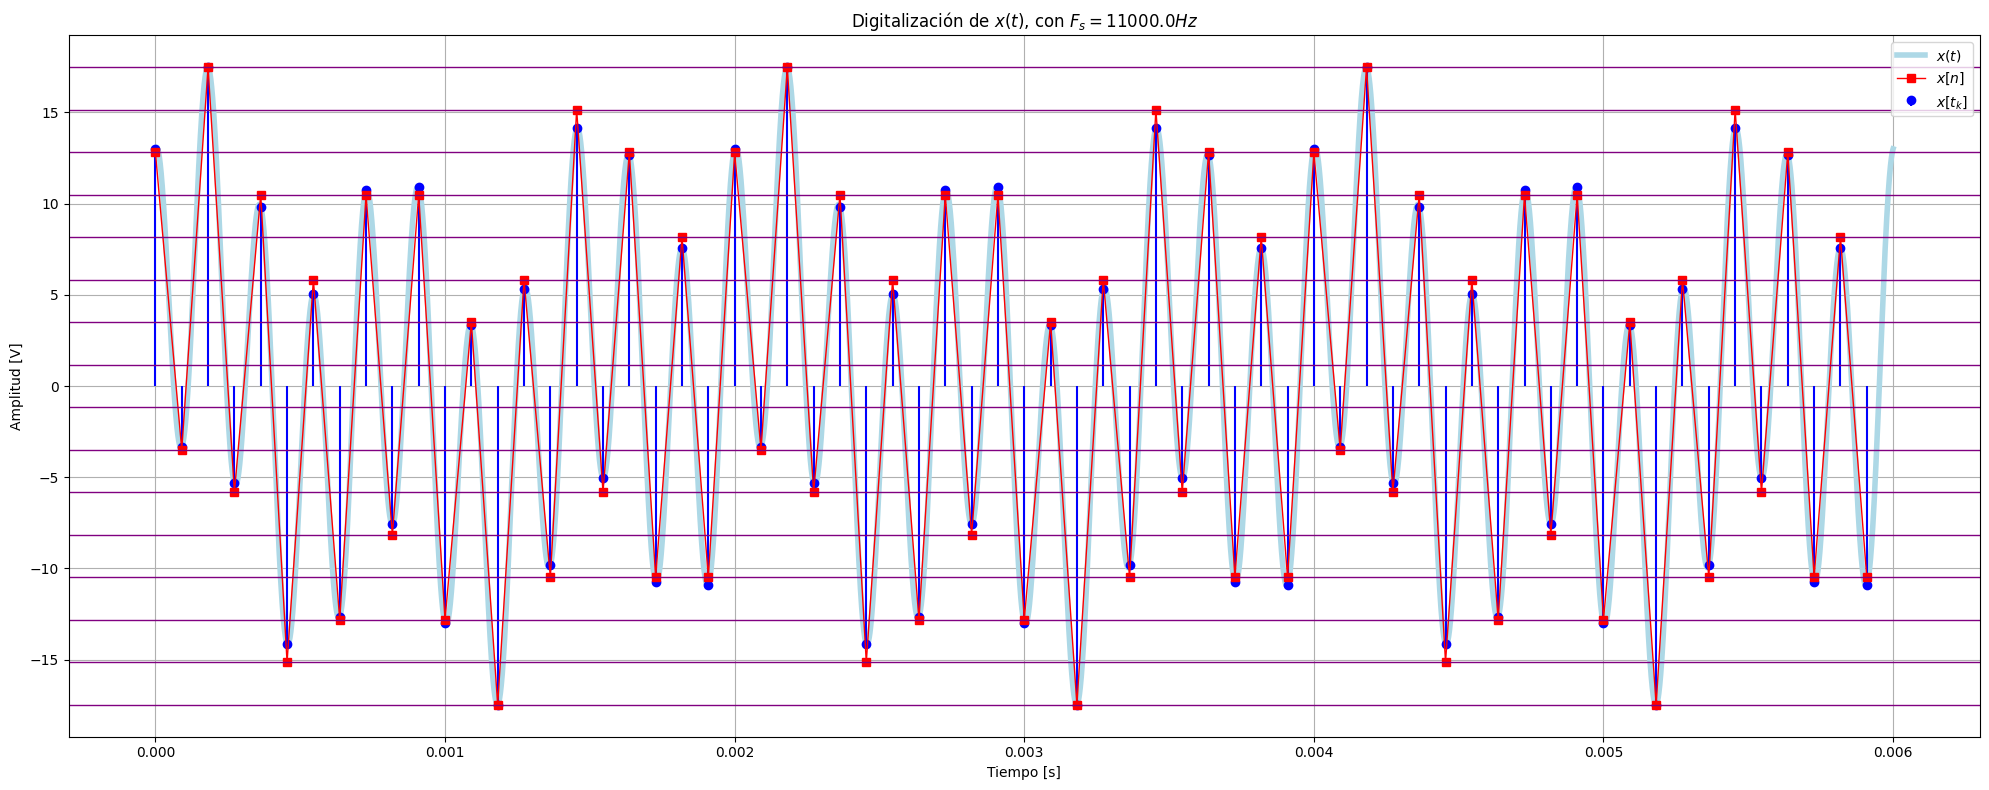

In [45]:
''' Parámetros del conversor A/D '''
# Muestreo
F_s = 2 * (11000 / 2)   # Frecuencia de muestreo [Hz] (Fs >= 2*f_max)
T_s = 1 / F_s           # Periodo de muestreo [s]

# Capacidad de representación
n_bits = 4              # Número de bits
num_levels = 2**n_bits  # Número de niveles de cuantización

''' Tiempos '''
T_0 = 1 / 500                        # Periodo de la señal x(t) [s]
sim_time = 3 * T_0                   # Tiempo de simulación [s]
t = np.linspace(0, sim_time, 20000)  # Vector de tiempo 'continuo' [s]
t_k = np.arange(0, sim_time, T_s)    # Vector de tiempo discreto [s]

''' Definición de la señal x(t) '''
x_t = 3 * np.cos(1000*np.pi*t) + 5 * np.sin(3000*np.pi*t) + 10 * np.cos(11000*np.pi*t)  # x(t) [V]

''' Digitalización '''
# Discretización
x_tk = 3 * np.cos(1000*np.pi*t_k) + 5 * np.sin(3000*np.pi*t_k) + 10 * np.cos(11000*np.pi*t_k)  # x[t_k] [V]

# Cuantización
levels = np.linspace(min(x_t), max(x_t), num_levels)  # Vector de niveles de cuantización
distances = np.abs(x_tk[:, None] - levels[None, :])   # Matriz de distancias entre muestras y niveles
indices = np.argmin(distances, axis=1)                # Índices de los niveles más cercanos

# Señal digitalizada
x_n = levels[indices]  # x[n] [V]

''' Visualización '''
# Gráfica 2: Digitalización de x(t) cumpliendo Nyquist
plt.figure(figsize=(20, 8))
plt.plot(t, x_t, label='$x(t)$', color='lightblue', linewidth=4)
plt.stem(t_k, x_tk, label='$x[t_k]$', linefmt='blue', markerfmt='blue', basefmt=" ")
plt.plot(t_k, x_n, label='$x[n]$', color='red', marker='s', linestyle='-', linewidth=1)

# Dibujar los niveles de cuantización como rectas constantes
for lvl in levels:
	plt.axhline(lvl, color='purple', linewidth=1)

plt.title('Digitalización de $x(t)$, con $F_s = {} Hz$'.format(F_s))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

---

**3.** Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t \in [t_i, t_f]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

<div align="center">

$c_n = \frac{1}{(t_{i}-t_{f})n^2\omega_0^2} \int_{t_i}^{t_f} x''(t)\, e^{-j n \omega_0 t}\, dt, \qquad n \in \mathbb{Z}$

</div>

¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?

---

**4.** Encuentre el espectro de Fourier, su parte real e imaginaria, magnitud, fase y el error relativo de la estimación para $n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$ a partir de $x''(t)$ para la señal $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$. Presente la simulaciones de Python respectivas.

<div align="center">
  <img src="Signal.png" alt="Signal" width="500">
  <br><strong>Figura 1. Señal x(t)</strong><br>
</div>